## 100 prisoners problem
    * class P100_Problem : problem class
    * class P100_Strategy : abstract strategy class
        * class P100_Strategy_Random : random strategy
        * class P100_Strategy_Sequential : sequential strategy
        * class P100_Strategy_Cycle : cycle following strategy
        * class P100_Strategy_Cycle_Plus : modified cycle following strategy


In [ ]:
# 첫번째 github upload를 성공적으로 마무리 했다.
# 수정본도 올라가는지 확인해보자.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class P100_Problem:
    def __init__(self, N=100, M=None):
        self.set_N_M(N, M)
        self.fails_allowed = 0

    def set_N_M(self, N, M=None):
        if M is None: M = N // 2
        self.N = N
        self.M = M
        self.box = np.arange(self.N)  # [0,1,2,...,N-1]
        self.shuffle_box()

    def shuffle_box(self):
        np.random.shuffle(self.box)

    # for loop version of opening boxes in ids
    # ids : numpy array of box indices to open
    def open_box_for(self, ids, target):
        for i in ids:
            if self.box[i] == target:
                return True # target is found
        return False

    # vector version of opening boxes in ids
    # ids : numpy array of box indices to open
    def open_box_vector(self, ids, target):
        b = (self.box[ids] == target)
        return b.any(axis=-1)

In [4]:
class P100_Strategy:
    def __init__(self, problem):
        self.P = problem
        self.fails = 0
        self.fails_allowed = 0
        self.fail_id = []
        self.verbose = 0
        self.n_episodes = 1000

    def get_strategy_name(self):
        return "Abstract strategy"

    def reset_problem(self):
        self.P.shuffle_box()
        self.fails = 0
        self.fail_id = []

    # execute strategy for one prisoner whose number is target
    # return True if success for target, False otherwise
    def execute_strategy(self, target):
        pass


    # execute strategy for all prisoners
    # return True if success for all prisoners, False otherwise
    def all_prisoner(self):
        for target in range(self.P.N):
            res = self.execute_strategy(target)
            if not res:
                if self.verbose > 0:
                    print(f"prisoner {target} failed!!")
                    print(f"all prisoners are dead now")
                self.fails += 1
                self.fail_id.append(target)
            if self.fails > self.fails_allowed:
                return False
        if self.verbose > 0: print(f"all prisoner escaped!!")
        return True

    # test self.n_episodes
    # return the number of successful episodes
    def test_n_episodes(self, prefix=""):
        n_success = 0
        for i in range(self.n_episodes):
            self.reset_problem()  # make new problem instance randomly
            if self.all_prisoner():
                n_success += 1
        print(f"{prefix} N={self.P.N}, M={self.P.M}, success/total = {n_success}/{self.n_episodes}")
        return n_success

    # change N in [6, 8, 12, ..., 28] and see success rate
    def change_N(self):
        title = f"Strategy = {self.get_strategy_name()}"
        print (title)
        self.fails_allowed = 0
        S = []
        N_range = range(6,30,2)
        for N in N_range:
            self.P.set_N_M(N)
            self.reset_problem()
            n_success = self.test_n_episodes()
            S.append(n_success/self.n_episodes)
        plt.plot(N_range, S, label=self.get_strategy_name())
        plt.xlabel("N (# of prisoners)")
        plt.ylabel("Success rate")
        plt.legend()

    # change fails_allowed in [0, 1, 2, ..., 9] and see success rate
    def change_fails_allowed(self):
        print (f"Strategy = {self.get_strategy_name()}")
        self.reset_problem()
        S = []
        fail_range = range(10)
        for self.fails_allowed in fail_range:
            n_success = self.test_n_episodes(f"fails_allowed={self.fails_allowed}")
            S.append(n_success/self.n_episodes)
        plt.ylim(0,1)
        plt.plot(fail_range, S, label=self.get_strategy_name())
        plt.xlabel(f"# of allowed fails, N={self.P.N}, M={self.P.M}")
        plt.ylabel("Success rate")
        plt.legend()

In [5]:
class P100_Strategy_Random(P100_Strategy):
    def get_strategy_name(self):
        return "Random strategy"

    # return True if target is found
    def execute_strategy(self, target):
        ids = np.random.choice(self.P.N, size=self.P.M, replace=False)
        return self.P.open_box_vector(ids, target)

In [6]:
class P100_Strategy_Sequential(P100_Strategy):
    def get_strategy_name(self):
        return "Sequential strategy"

    # Task 1-1 : complete this method with Sequential strategy
    # return True if target is found
    def execute_strategy(self, target):
        #print('target = ')
        #print(target)
        if target <= self.P.M :
            idslist = list(range(target, target+ self.P.M))
        else:
            idslist = list(range(target, self.P.N)) + list(range(0, target - self.P.M))
        ids = np.array(idslist)
        
        return self.P.open_box_vector(ids, target)

Strategy = Random strategy
 N=6, M=3, success/total = 142/10000
 N=8, M=4, success/total = 36/10000
 N=10, M=5, success/total = 10/10000
 N=12, M=6, success/total = 1/10000
 N=14, M=7, success/total = 0/10000
 N=16, M=8, success/total = 0/10000
 N=18, M=9, success/total = 0/10000
 N=20, M=10, success/total = 0/10000
 N=22, M=11, success/total = 0/10000
 N=24, M=12, success/total = 0/10000
 N=26, M=13, success/total = 0/10000
 N=28, M=14, success/total = 0/10000
Strategy = Sequential strategy
 N=6, M=3, success/total = 295/10000
 N=8, M=4, success/total = 70/10000
 N=10, M=5, success/total = 17/10000
 N=12, M=6, success/total = 4/10000
 N=14, M=7, success/total = 3/10000
 N=16, M=8, success/total = 0/10000
 N=18, M=9, success/total = 0/10000
 N=20, M=10, success/total = 0/10000
 N=22, M=11, success/total = 0/10000
 N=24, M=12, success/total = 0/10000
 N=26, M=13, success/total = 0/10000
 N=28, M=14, success/total = 0/10000


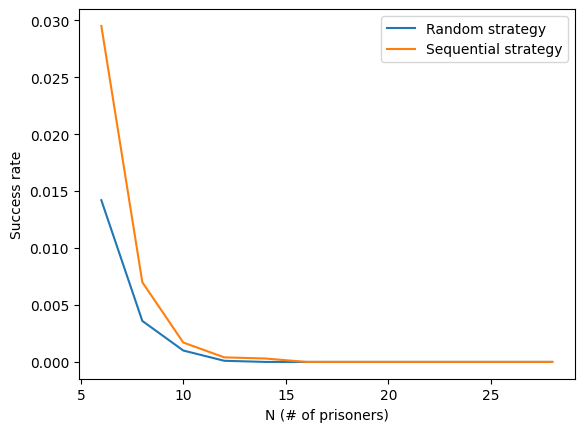

In [7]:
# Task 1-2 : run this cell
pp = P100_Problem(20)
rs = P100_Strategy_Random(pp)
rs.n_episodes = 10000
rs.change_N()


# 여기서부턴 아직 안짜서 못돌림
ss = P100_Strategy_Sequential(pp)
ss.n_episodes = 10000
ss.change_N()

In [8]:
class P100_Strategy_Cycle(P100_Strategy):
    def get_strategy_name(self):
        return "Cycle strategy"

    # Task 2-1 : complete this method with cycle strategy
    # return True if target is found
    def execute_strategy(self, target):
        idslist = [target]
        t = target
        for i in range(self.P.M -1):
            idslist.append(self.P.box[t])
            t = self.P.box[t]
        
        # print(len(idslist))
        ids = idslist

        return self.P.open_box_vector(ids, target)

Strategy = Random strategy
 N=6, M=3, success/total = 136/10000
 N=8, M=4, success/total = 31/10000
 N=10, M=5, success/total = 12/10000
 N=12, M=6, success/total = 7/10000
 N=14, M=7, success/total = 1/10000
 N=16, M=8, success/total = 0/10000
 N=18, M=9, success/total = 0/10000
 N=20, M=10, success/total = 0/10000
 N=22, M=11, success/total = 0/10000
 N=24, M=12, success/total = 0/10000
 N=26, M=13, success/total = 0/10000
 N=28, M=14, success/total = 0/10000
Strategy = Sequential strategy
 N=6, M=3, success/total = 267/10000
 N=8, M=4, success/total = 64/10000
 N=10, M=5, success/total = 14/10000
 N=12, M=6, success/total = 3/10000
 N=14, M=7, success/total = 1/10000
 N=16, M=8, success/total = 0/10000
 N=18, M=9, success/total = 1/10000
 N=20, M=10, success/total = 0/10000
 N=22, M=11, success/total = 0/10000
 N=24, M=12, success/total = 0/10000
 N=26, M=13, success/total = 0/10000
 N=28, M=14, success/total = 0/10000
Strategy = Cycle strategy
 N=6, M=3, success/total = 3791/10000


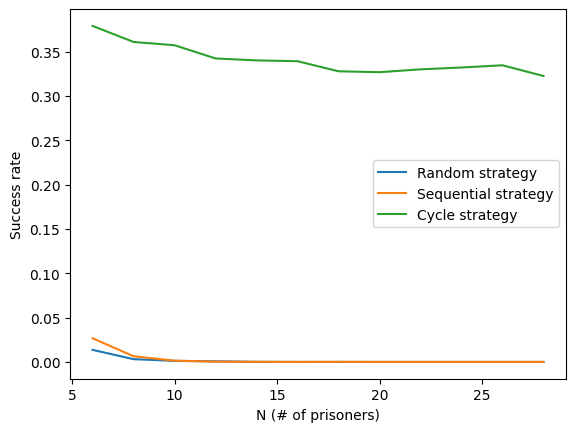

In [9]:
# Task 2-2 : run this cell
rs.change_N()
ss.change_N()

cs = P100_Strategy_Cycle(pp)
cs.n_episodes = 10000
cs.change_N()

# Task 3-0 : Briefly explain your approach to task 3 here
- 여태까지 실패한 사람 수(self.fails)를 죄수가 알 수 있음을 이용하고자 하였습니다.
- 죄수가 cycle 법칙대로 상자를 열었을 때 실패하는 이유는, cycle의 길이가 전체 수감자 수의 절반(M)보다 길어지는 cycle이 존재하기 때문입니다. 따라서 cycle에 변화를 주기 위해서는 상자의 번호를 바꿔야한다고 생각하였습니다.
- 이에 따라 기존 상자의 번호에 self.fails 만큼 더한 번호에 맞춰 죄수들이 상자를 열고 닫을 수 있도록 코드를 작성하였습니다.
- 예를 들어, 기존 상자의 번호가 0, 1, 2, 3, 4, 5, 6, 7이고, self.fails = 2라면, 2, 3, 4, 5, 6, 7, 0, 1로 상자 번호가 바뀌었다고 생각하고 죄수가 이동하는 구조입니다.
- 이와 같이 상자의 번호를 바꾸면, cycle의 길이가 기존보다 줄어들게 되어(절반(M)보다 길이가 짧은 cycle이 됨) 죄수들이 통과할 확률이 높아집니다.

In [32]:
class P100_Strategy_Cycle_Plus(P100_Strategy):
    def get_strategy_name(self):
        return "Cycle+ strategy"

    # Task 3-1 : complete this method for utilizing allowed failures
    # return True if target is found
    def execute_strategy(self, target):
        t = target + self.fails
        if t>= self.P.N:
            t = t-self.P.N
        idslist = [t]
        
        t1 = t
        for i in range(self.P.M -1):
            t1 = self.P.box[t1] + self.fails
            if t1 >= self.P.N:
                t1 = t1 - self.P.N
            idslist.append(t1)
        
        ids = np.array(idslist)

        return self.P.open_box_vector(ids, target)

Strategy = Sequential strategy
fails_allowed=0 N=20, M=10, success/total = 0/1000
fails_allowed=1 N=20, M=10, success/total = 0/1000
fails_allowed=2 N=20, M=10, success/total = 1/1000
fails_allowed=3 N=20, M=10, success/total = 1/1000
fails_allowed=4 N=20, M=10, success/total = 10/1000
fails_allowed=5 N=20, M=10, success/total = 26/1000
fails_allowed=6 N=20, M=10, success/total = 57/1000
fails_allowed=7 N=20, M=10, success/total = 139/1000
fails_allowed=8 N=20, M=10, success/total = 272/1000
fails_allowed=9 N=20, M=10, success/total = 402/1000
Strategy = Cycle strategy
fails_allowed=0 N=20, M=10, success/total = 367/1000
fails_allowed=1 N=20, M=10, success/total = 316/1000
fails_allowed=2 N=20, M=10, success/total = 327/1000
fails_allowed=3 N=20, M=10, success/total = 321/1000
fails_allowed=4 N=20, M=10, success/total = 349/1000
fails_allowed=5 N=20, M=10, success/total = 302/1000
fails_allowed=6 N=20, M=10, success/total = 312/1000
fails_allowed=7 N=20, M=10, success/total = 316/1000


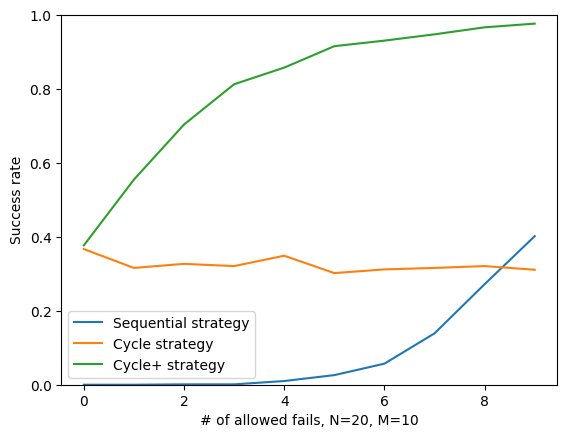

In [34]:
# Task 3-2 : run this cell
pp = P100_Problem(20)
ss = P100_Strategy_Sequential(pp)
ss.change_fails_allowed()

cs = P100_Strategy_Cycle(pp)
cs.change_fails_allowed()

csp = P100_Strategy_Cycle_Plus(pp)
csp.change_fails_allowed()

Strategy = Sequential strategy
fails_allowed=0 N=100, M=50, success/total = 0/1000
fails_allowed=1 N=100, M=50, success/total = 0/1000
fails_allowed=2 N=100, M=50, success/total = 0/1000
fails_allowed=3 N=100, M=50, success/total = 0/1000
fails_allowed=4 N=100, M=50, success/total = 0/1000
fails_allowed=5 N=100, M=50, success/total = 0/1000
fails_allowed=6 N=100, M=50, success/total = 0/1000
fails_allowed=7 N=100, M=50, success/total = 0/1000
fails_allowed=8 N=100, M=50, success/total = 0/1000
fails_allowed=9 N=100, M=50, success/total = 0/1000
Strategy = Cycle strategy
fails_allowed=0 N=100, M=50, success/total = 324/1000
fails_allowed=1 N=100, M=50, success/total = 319/1000
fails_allowed=2 N=100, M=50, success/total = 318/1000
fails_allowed=3 N=100, M=50, success/total = 326/1000
fails_allowed=4 N=100, M=50, success/total = 315/1000
fails_allowed=5 N=100, M=50, success/total = 316/1000
fails_allowed=6 N=100, M=50, success/total = 312/1000
fails_allowed=7 N=100, M=50, success/total = 

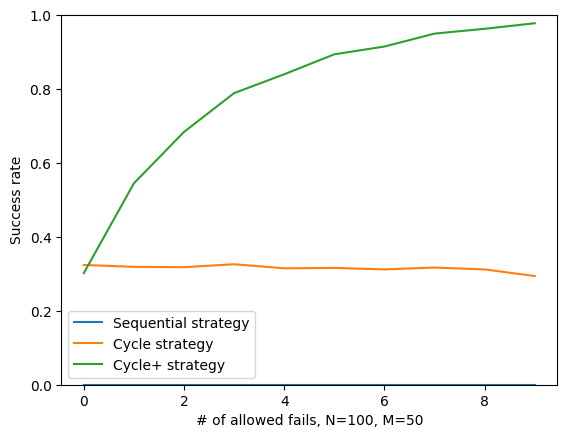

In [35]:
# Task 3-3 : run this cell
pp = P100_Problem(100)
ss = P100_Strategy_Sequential(pp)
ss.change_fails_allowed()

cs = P100_Strategy_Cycle(pp)
cs.change_fails_allowed()

csp = P100_Strategy_Cycle_Plus(pp)
csp.change_fails_allowed()